In [1]:
import nengo
import nengo_loihi
from nxsdk.graph.monitor.probes import PerformanceProbeCondition
from nxsdk.api.n2a import ProbeParameter
import numpy as np

run_time = 0.140
dt = 0.001

############  My code for LDSNN ###################
from ldsnn import get_nengo_ldsnn_model, get_A_p_and_B_p_matrices, get_enc_transform_matrix

d = 10
A_p, B_p = get_A_p_and_B_p_matrices(d)
t_mat = get_enc_transform_matrix(d)
np.random.seed(45)
lyr_e2h = np.random.rand(2*d, 3*d)
np.random.seed(45)
lyr_h2o = np.random.rand(3*d, 2)
x = np.random.rand(int(run_time*1000)) - 1.0

net = get_nengo_ldsnn_model(x, A_p, B_p, t_mat, lyr_e2h, lyr_h2o, d)
################################################

############  My code for SLRC ###################
# from slrc import get_nengo_slrc_model, get_A_p_and_B_p_matrices
# d = 10
# A_p, B_p = get_A_p_and_B_p_matrices(d)
# x = np.random.rand(int(run_time*1000)) - 1.0

# net = get_nengo_slrc_model(x, A_p, B_p, d, n_nrns=100)
################################################

sim = nengo_loihi.Simulator(net, dt=dt)
board = sim.sims["loihi"].nxsdk_board
probe_cond = PerformanceProbeCondition(
    tStart=1, tEnd=int(run_time / dt)*1, bufferSize=1024 * 2, binSize=4
)
e_probe = board.probe(ProbeParameter.ENERGY, probe_cond)

with sim:
    sim.run(run_time)
    
print("Done!!!")

Running the LDSNN network...
INFO:DRV:  SLURM is being run in background


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nengo_loihi/builder/ensemble.py:164: UserWarning: NengoLoihi does not support initial values for 'voltage' being non-zero on SpikingRectifiedLinear neurons. On the chip, all values will be initialized to zero.
  warnings.warn(


INFO:DRV:  Connecting to 10.212.98.104:42081
INFO:DRV:      Host server up..............Done 0.18s
INFO:DRV:      Encoding axons/synapses.....Done 3.35ms
INFO:DRV:      Compiling Embedded snips....Done 0.17s
INFO:DRV:      Compiling MPDS Registers....Done 0.51ms
INFO:HST:  Args chip=0 cpu=0 /homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1674072761.9168742/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --cpu-active-ratio=1 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 0.78s
INFO:DRV:      Encoding probes.............Done 0.38ms
INFO:DRV:      Transferring probes.........Done 5.38ms
INFO:DRV:      Configuring registers.......Done 3.78ms
INFO:DRV:      Transferring spikes.........Done 0.01s
INFO:DRV:      Executing...................Done 0.09s
INFO:DRV:      Processing timeseries.......Done 0.02s
INFO:DRV:  Executor: 140 timesteps.........Done 0.14s
INFO:HST:  chip=0 cpu=0 halted, status=0x0
Done!!!


/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
e_probe.totalEnergy, e_probe.energyUnits

(72627.415, 'uJ')

# #######################################################

In [12]:
e_probe.energyUnits

'uJ'

In [7]:
print(dir(e_probe))

['EnergyPhase', 'EnergyType', 'NUM_ENERGY_PHASES', 'NUM_ENERGY_TYPES', 'NUM_ENERGY_VALUES', '_EnergyPhaseEnum', '_EnergyTypeEnum', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_aggregateDataPerTimeStep', '_aggregateRawPowerData', '_assertProbeReady', '_collectPerRunData', '_computeEnergies', '_energyArray', '_getTimeStampOffset', '_numpyEnergyArray', '_updateProbe', 'allTimeStamps', 'binSize', 'bufferSize', 'done', 'endTimeStamps', 'energyUnits', 'etMonitor', 'getEnergyPerTimeStep', 'hostPhaseEnergyPerTimeStep', 'hostTimePerTimeStep', 'id', 'isDone', 'isReady', 'learningPhaseEnergyPerTimeStep', 'learningTimePerTimeStep', 'managementPhaseEnergy

In [22]:
print(e_probe.totalEnergyPerTimeStep.shape) # 1D, total energy per timestep for all energy types and phases
print(e_probe.totalEnergyPerTimeStep)
print(np.sum(e_probe.totalEnergyPerTimeStep)) # Matches e_probe.totalEnergy

(140,)
[804.078 548.628 503.04  513.258 536.052 507.756 499.896 500.682 572.208
 555.702 524.262 523.476 520.332 518.76  530.55  521.904 569.85  538.41
 510.114 510.9   518.76  520.332 521.904 528.978 531.336 528.192 525.048
 514.044 510.9   513.258 526.62  519.546 598.932 545.484 518.76  515.616
 520.332 525.048 528.978 529.764 509.328 525.834 516.402 520.332 512.472
 519.546 532.908 522.69  507.756 532.908 520.332 524.262 529.764 533.694
 523.476 526.62  513.258 522.69  525.048 514.044 508.542 510.114 521.904
 520.332 638.232 532.122 523.476 523.476 673.602 521.904 518.76  519.546
 514.044 523.476 525.834 514.044 521.118 532.122 510.9   525.834 513.258
 521.118 514.83  539.196 507.756 532.122 518.76  528.192 519.546 524.262
 518.76  513.258 517.188 520.332 506.184 527.406 512.472 510.114 533.694
 508.542 506.184 521.118 516.402 533.694 514.83  515.616 520.332 526.62
 525.834 522.69  499.896 512.472 532.122 544.698 528.192 522.69  518.76
 512.472 524.262 497.538 518.76  518.76  514.83

In [27]:
e_probe.EnergyType(0), e_probe.EnergyType(1)

(<_EnergyTypeEnum.VDD: 0>, <_EnergyTypeEnum.VDDM: 1>)

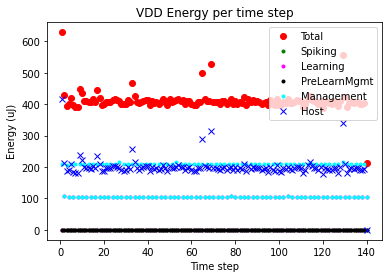

In [29]:
e_probe.plotEnergyType(0) # VDD Plot with energy = NeuroCores + Embedded Lakemont CPU + everything else

In [9]:
e_probe.NUM_ENERGY_VALUES, e_probe.EnergyPhase, e_probe.EnergyType

(100, <enum '_EnergyPhaseEnum'>, <enum '_EnergyTypeEnum'>)

In [11]:
e_probe.totalEnergy

67142.29500000001

In [13]:
e_probe.totalEnergy

67062.45

# #################################################################

In [15]:
e_probe.totalEnergy

64989.872

In [17]:
e_probe.totalEnergy

65145.024

In [3]:
e_probe.totalEnergy

65839.02